In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
train = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/train.csv")
test = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/test.csv")
submission = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/submission_sample.csv")
bus = pd.read_csv("C:\\Users\\82105\\Desktop\\dacon 3/bus_bts.csv")


In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
id               415423 non-null int64
date             415423 non-null object
bus_route_id     415423 non-null int64
in_out           415423 non-null object
station_code     415423 non-null int64
station_name     415423 non-null object
latitude         415423 non-null float64
longitude        415423 non-null float64
6~7_ride         415423 non-null float64
7~8_ride         415423 non-null float64
8~9_ride         415423 non-null float64
9~10_ride        415423 non-null float64
10~11_ride       415423 non-null float64
11~12_ride       415423 non-null float64
6~7_takeoff      415423 non-null float64
7~8_takeoff      415423 non-null float64
8~9_takeoff      415423 non-null float64
9~10_takeoff     415423 non-null float64
10~11_takeoff    415423 non-null float64
11~12_takeoff    415423 non-null float64
18~20_ride       415423 non-null float64
dtypes: float64(15), int64(3), object

In [4]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
train.loc[train['18~20_ride'].idxmax()]

id                      190528
date                2019-09-15
bus_route_id          23620000
in_out                      시내
station_code               638
station_name     제주국제공항(구제주방면)
latitude               33.5066
longitude              126.493
6~7_ride                     3
7~8_ride                    31
8~9_ride                    32
9~10_ride                   49
10~11_ride                  36
11~12_ride                  41
6~7_takeoff                  6
7~8_takeoff                 14
8~9_takeoff                 20
9~10_takeoff                11
10~11_takeoff                8
11~12_takeoff                8
18~20_ride                 272
Name: 190528, dtype: object

In [25]:
train.groupby("9~10_ride").size().head(5) ## 그룹확인

9~10_ride
0.0    310138
1.0     53106
2.0     22511
3.0     10825
4.0      6047
dtype: int64

In [7]:
train1 = train.copy() ## 복사본

In [8]:
train1['date'] = pd.to_datetime(train1['date'])

In [9]:
train1['weekday'] = train1['date'].dt.strftime('%a') ## 요일을 문자형으로 변환

In [10]:
train1

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sun
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Sun
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sun
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,Sun
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sun
5,5,2019-09-01,4270000,시내,1648,예래입구,33.25862,126.40442,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Sun
6,6,2019-09-01,4270000,시외,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,Sun
7,7,2019-09-01,4270000,시외,1666,창천리,33.26598,126.37082,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Sun
8,8,2019-09-01,4270000,시외,1726,강정농협,33.23603,126.47827,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,Sun
9,9,2019-09-01,4270000,시내,2008,서귀포항,33.23977,126.56450,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,Sun


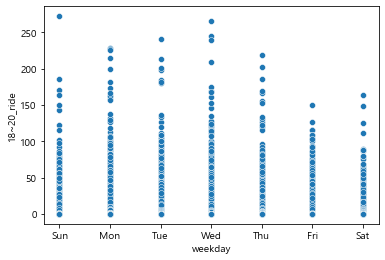

In [35]:
sns.scatterplot(x=train1['weekday'],
                y=train1['18~20_ride'])

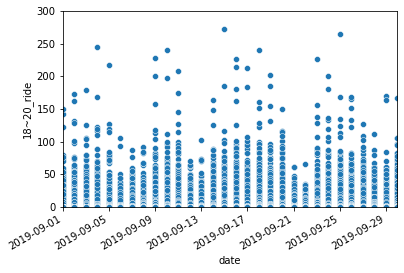

In [12]:
sns.scatterplot(x=train1['date'],
                y=train1['18~20_ride'])

plt.xlim('2019-09-01','2019-09-30')
plt.ylim(0,300)
plt.gcf().autofmt_xdate() ## x축 안겹치게
plt.show()

In [17]:
train1['7~9_ride'] = train1['7~8_ride'] + train1['8~9_ride']
ride = train1.groupby('date')[['18~20_ride','7~9_ride']].agg('sum') ## 합계 기준
ride.reset_index(inplace=True)

In [18]:
ride

,date,18~20_ride,7~9_ride
0,2019-09-01,11537.0,10200.0
1,2019-09-02,20561.0,26119.0
2,2019-09-03,19743.0,29868.0
3,2019-09-04,20133.0,27564.0
4,2019-09-05,20392.0,30710.0
5,2019-09-06,8162.0,28522.0
6,2019-09-07,12389.0,7215.0
7,2019-09-08,10306.0,9922.0
8,2019-09-09,20135.0,27829.0
9,2019-09-10,22805.0,32562.0


In [15]:
plt.rcParams['font.family'] = 'Malgun Gothic' ## 폰트 깨질때

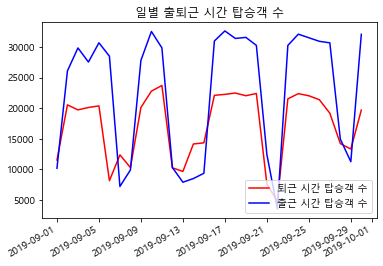

In [16]:
plt.plot('date','18~20_ride','r',label = '퇴근 시간 탑승객 수', data = ride)
plt.plot('date','7~9_ride','b', label = "출근 시간 탑승객 수", data = ride)
plt.gcf().autofmt_xdate() ## x축이 겹치지 않게 해줌
plt.legend(loc=4) ## 그래프 상에서 범례표시 위치 지정
plt.title('일별 출퇴근 시간 탑승객 수')
plt.show()

In [78]:
train1['7~9_ride'] = train1['7~8_ride'] + train1['8~9_ride']
ride = train1.groupby('weekday')[['18~20_ride','7~9_ride']].agg('max')## 최대 기준
ride.reset_index(inplace=True)

In [94]:
weekday = ['Mon', 'Tue', 'Wed', 'Tue', 'Fri', 'Sat', 'Sun'] # 순서 정하기
train1['7~9_ride'] = train1['7~8_ride'] + train1['8~9_ride']
ride = train1.groupby('weekday')[['18~20_ride','7~9_ride']].agg('sum').reindex(weekday)
ride.reset_index(inplace=True)


In [95]:
ride

,weekday,18~20_ride,7~9_ride
0,Mon,104073.0,147325.0
1,Tue,87220.0,127198.0
2,Wed,88404.0,120395.0
3,Tue,87220.0,127198.0
4,Fri,59451.0,97434.0
5,Sat,48419.0,43167.0
6,Sun,54306.0,44302.0


In [19]:
test.loc[test['11~12_takeoff'].idxmax()]

id                   545087
date             2019-10-10
bus_route_id       23610000
in_out                   시내
station_code            283
station_name      중앙로(현대약국)
latitude            33.5109
longitude           126.524
6~7_ride                  1
7~8_ride                 10
8~9_ride                 16
9~10_ride                21
10~11_ride               24
11~12_ride               47
6~7_takeoff               4
7~8_takeoff              10
8~9_takeoff              12
9~10_takeoff             20
10~11_takeoff            21
11~12_takeoff            56
Name: 129664, dtype: object

SyntaxError: invalid syntax (<ipython-input-96-84c3a1d09510>, line 1)